In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')
''''
import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None) '''

"'\nimport matplotlib\nmatplotlib.rc('font', family='AppleGothic')\nmatplotlib.rc('axes', unicode_minus=False)\n\nfrom IPython.display import set_matplotlib_formats\nset_matplotlib_formats('retina')\n\n# 그래프 틀 변경\nplt.rcParams['axes.unicode_minus'] = False\nsns.set(font_scale = 1)  \nplt.style.use(['fivethirtyeight'])\npd.set_option('display.max_columns', None) "

In [2]:
clean_data= pd.read_csv('nike_dunk_low_preprocessed.csv',  index_col = 0)
df = clean_data.copy()

# after_day 양에 값만 추출 
df = df[df['after_day'] >= 0]
df.head()

,size,price,date,product,release_date,color,release_price,number,wish,review,transactions,size_target,color1,color2,color3,color4,after_day
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,9
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,10
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,16
3,235,260000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,17
4,240,240000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,17


In [3]:
df.shape

(140768, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140768 entries, 0 to 145553
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   size           140768 non-null  int64  
 1   price          140768 non-null  int64  
 2   date           140768 non-null  object 
 3   product        140768 non-null  object 
 4   release_date   140768 non-null  object 
 5   color          140768 non-null  object 
 6   release_price  140768 non-null  int64  
 7   number         140768 non-null  float64
 8   wish           140768 non-null  float64
 9   review         140768 non-null  float64
 10  transactions   140768 non-null  int64  
 11  size_target    140768 non-null  object 
 12  color1         140768 non-null  object 
 13  color2         140588 non-null  object 
 14  color3         25602 non-null   object 
 15  color4         4468 non-null    object 
 16  after_day      140768 non-null  int64  
dtypes: float64(3), int64(5), obje

In [5]:
df.isnull().any()

size             False
price            False
date             False
product          False
release_date     False
color            False
release_price    False
number           False
wish             False
review           False
transactions     False
size_target      False
color1           False
color2            True
color3            True
color4            True
after_day        False
dtype: bool

In [6]:
df['Bought for Less Than release'] = df['price'] < df['release_price']
df.head(3)

,size,price,date,product,release_date,color,release_price,number,wish,review,transactions,size_target,color1,color2,color3,color4,after_day,Bought for Less Than release
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,9,False
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,10,False
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,16,False


In [7]:
df['Bought for More Than release'] = df['price'] > df['release_price']
df.head(3)

,size,price,date,product,release_date,color,release_price,number,wish,review,transactions,size_target,color1,color2,color3,color4,after_day,Bought for Less Than release,Bought for More Than release
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,9,False,True
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,10,False,True
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,297,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,16,False,True


In [8]:
# 발매가와 현재 판매가 차이 퍼센트 
df['Rise'] = (df['price'] / df['release_price'] * 100).round(2)
# 발매가와 현재 판매가 차이
df['profit'] = df['price'] - df['release_price']
df.head(3)

,size,price,date,product,release_date,color,release_price,number,wish,review,...,size_target,color1,color2,color3,color4,after_day,Bought for Less Than release,Bought for More Than release,Rise,profit
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,9,False,True,248.02,149200
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,10,False,True,248.02,149200
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,16,False,True,277.78,179200


In [9]:
# 남성 , 여성(GS,W) , 아동(PS, TD) 구분

In [10]:
df_men = df[(~df['product'].str.contains('GS')) & (~df['product'].str.contains('PS')) & (~df['product'].str.contains('TD'))&(~df['product'].str.contains('(W)'))]

In [11]:
# 남성
df_men.head()

,size,price,date,product,release_date,color,release_price,number,wish,review,...,size_target,color1,color2,color3,color4,after_day,Bought for Less Than release,Bought for More Than release,Rise,profit
12961,280,269000,2021-02-11,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,"['BLACK', 'HYPERCOBALT-WHITE', '', '']",119000,44568.0,4247.0,409.0,...,Male,BLACK,HYPERCOBALT-WHITE,NaN,NaN,0,False,True,226.05,150000
12962,270,218000,2021-02-11,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,"['BLACK', 'HYPERCOBALT-WHITE', '', '']",119000,44568.0,4247.0,409.0,...,Male,BLACK,HYPERCOBALT-WHITE,NaN,NaN,0,False,True,183.19,99000
12963,255,210000,2021-02-11,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,"['BLACK', 'HYPERCOBALT-WHITE', '', '']",119000,44568.0,4247.0,409.0,...,Male,BLACK,HYPERCOBALT-WHITE,NaN,NaN,0,False,True,176.47,91000
12964,275,229000,2021-02-11,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,"['BLACK', 'HYPERCOBALT-WHITE', '', '']",119000,44568.0,4247.0,409.0,...,Male,BLACK,HYPERCOBALT-WHITE,NaN,NaN,0,False,True,192.44,110000
12965,290,235000,2021-02-11,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,"['BLACK', 'HYPERCOBALT-WHITE', '', '']",119000,44568.0,4247.0,409.0,...,Male,BLACK,HYPERCOBALT-WHITE,NaN,NaN,0,False,True,197.48,116000


In [12]:
df_men.describe().round(-1)

,size,price,release_price,number,wish,review,transactions,after_day,Rise,profit
count,80860.0,80860.0,80860.0,80860.0,80860.0,80860.0,80860.0,80860.0,80860.0,80860.0
mean,270.0,405130.0,124260.0,35930.0,16620.0,2010.0,5890.0,70.0,320.0,280870.0
std,10.0,330730.0,10520.0,8090.0,17560.0,2800.0,6270.0,110.0,220.0,324440.0
min,220.0,121000.0,106800.0,50.0,20.0,0.0,0.0,0.0,90.0,-15300.0
25%,260.0,229000.0,119000.0,28030.0,4320.0,250.0,1450.0,10.0,180.0,104000.0
50%,270.0,325000.0,119000.0,37600.0,11000.0,760.0,3000.0,50.0,260.0,202000.0
75%,280.0,393000.0,129000.0,41190.0,16000.0,1540.0,7760.0,100.0,320.0,268000.0
max,310.0,5500000.0,213600.0,47880.0,51000.0,7680.0,18150.0,3210.0,4640.0,5381400.0


In [13]:
df_men.columns

Index(['size', 'price', 'date', 'product', 'release_date', 'color',
       'release_price', 'number', 'wish', 'review', 'transactions',
       'size_target', 'color1', 'color2', 'color3', 'color4', 'after_day',
       'Bought for Less Than release', 'Bought for More Than release', 'Rise',
       'profit'],
      dtype='object')

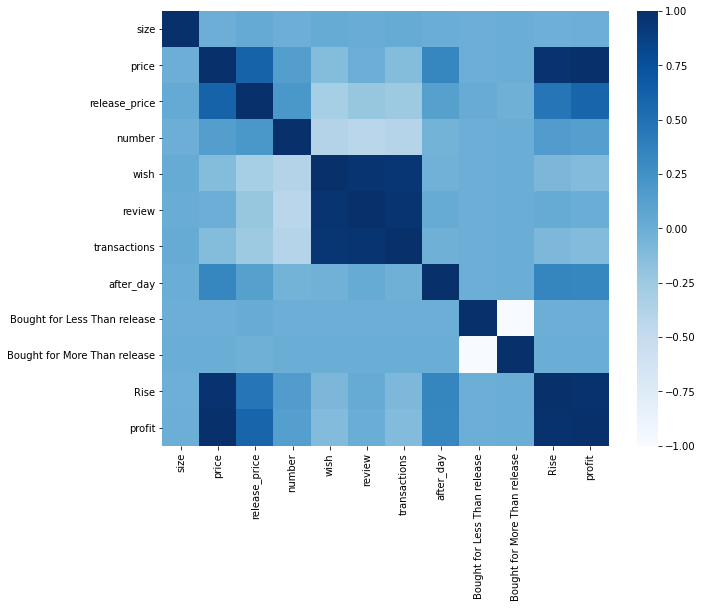

In [65]:
fig, ax = plt.subplots(figsize  = (10,8))
sns.heatmap(df_men.corr(), cmap = 'Blues' )

plt.show()

In [15]:
# product (중앙값 1060 , 제품수가 많아 중앙값 이상으로 판매가 이루어진 제품으로 그래프 생성 )
df_men_product_count = pd.DataFrame(df_men['product'].value_counts().sort_values(ascending = True))
df_men_product_count = df_men_product_count[df_men_product_count['product']>= 1060]
df_men_product_count.head()

,product
Nike x NBA Dunk Low Retro EMB Nets,1327
Nike SB Dunk Low Pro Classic Green,1347
Nike Dunk Low SE Seoul (with Special Gift),1366
Nike Dunk Low Retro Hyper Cobalt,1369
Nike SB Dunk Low Pro Clear Jade,1400


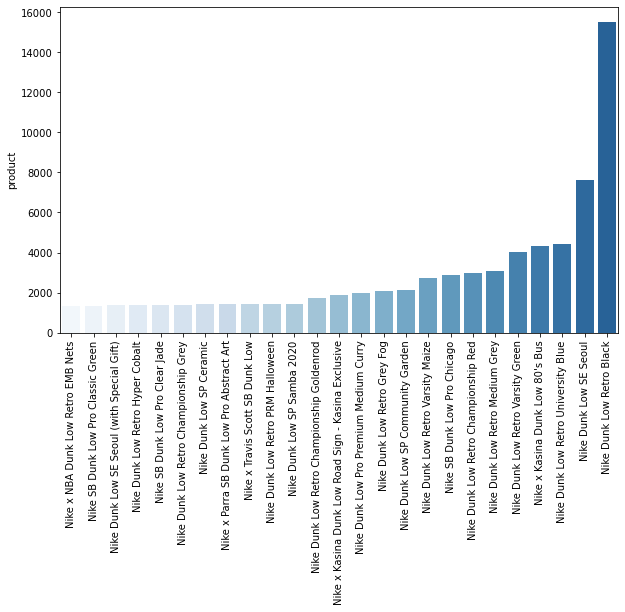

In [16]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 30)
sns.barplot(df_men_product_count.index ,df_men_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

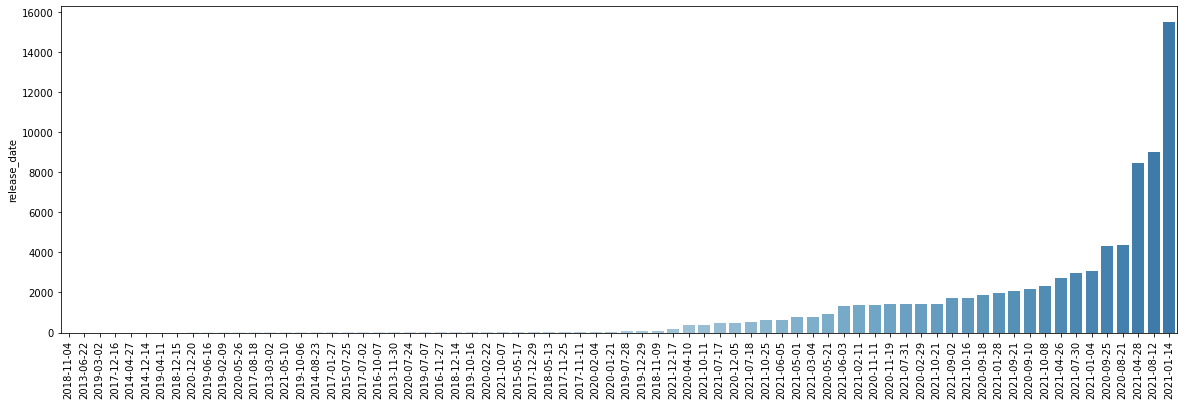

In [17]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 100)
sns.barplot(df_men['release_date'].value_counts().sort_values(ascending = True).index, 
            df_men['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [18]:
df_men_date = pd.DataFrame(df_men['date'].value_counts())
df_men_date = df_men_date[df_men_date['date'] >=300]

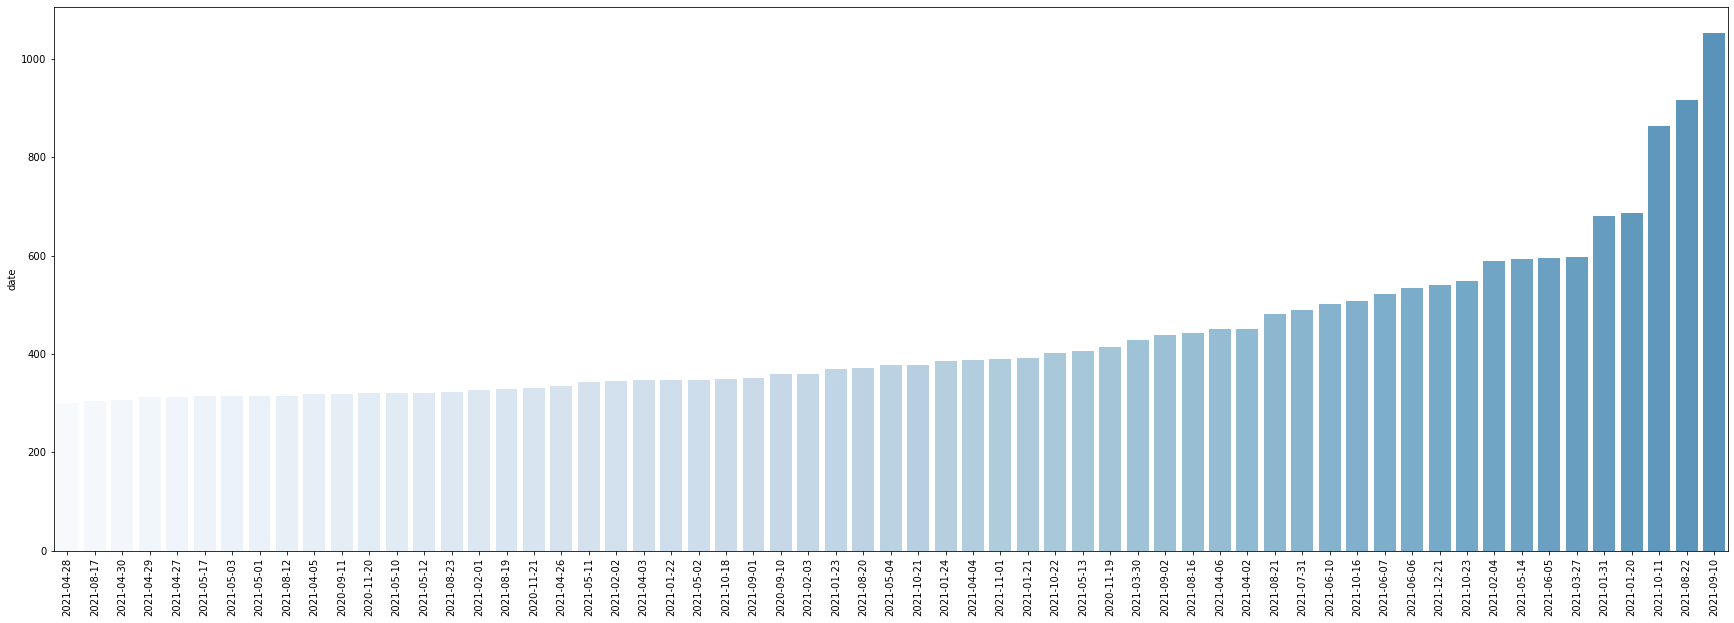

In [19]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",100)
sns.barplot(df_men_date.index, 
            df_men_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

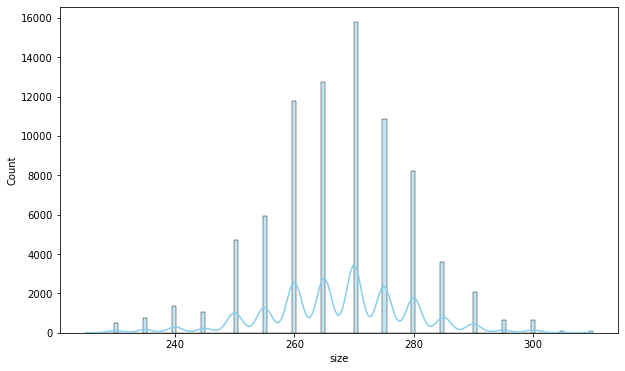

In [20]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_men['size'], kde = True, ax = ax, color = 'skyblue')
plt.show()

In [21]:
df_men_size_p = df_men.groupby('size')['price'].median().round(0)

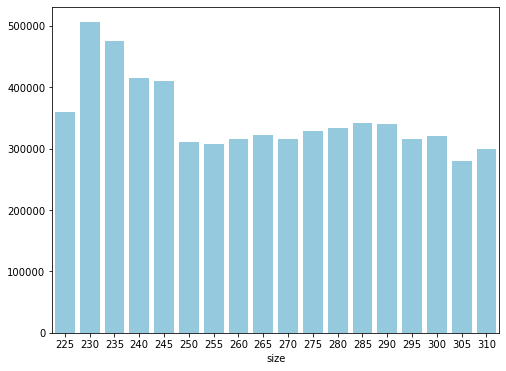

In [22]:
# 사이즈 따른 가격

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df_men_size_p.index , df_men_size_p.values , ax = ax, color = 'skyblue')
plt.show()

In [23]:
df_men_pp = np.round(df_men.groupby('product')['price'].median(),-1).sort_values(ascending = True)

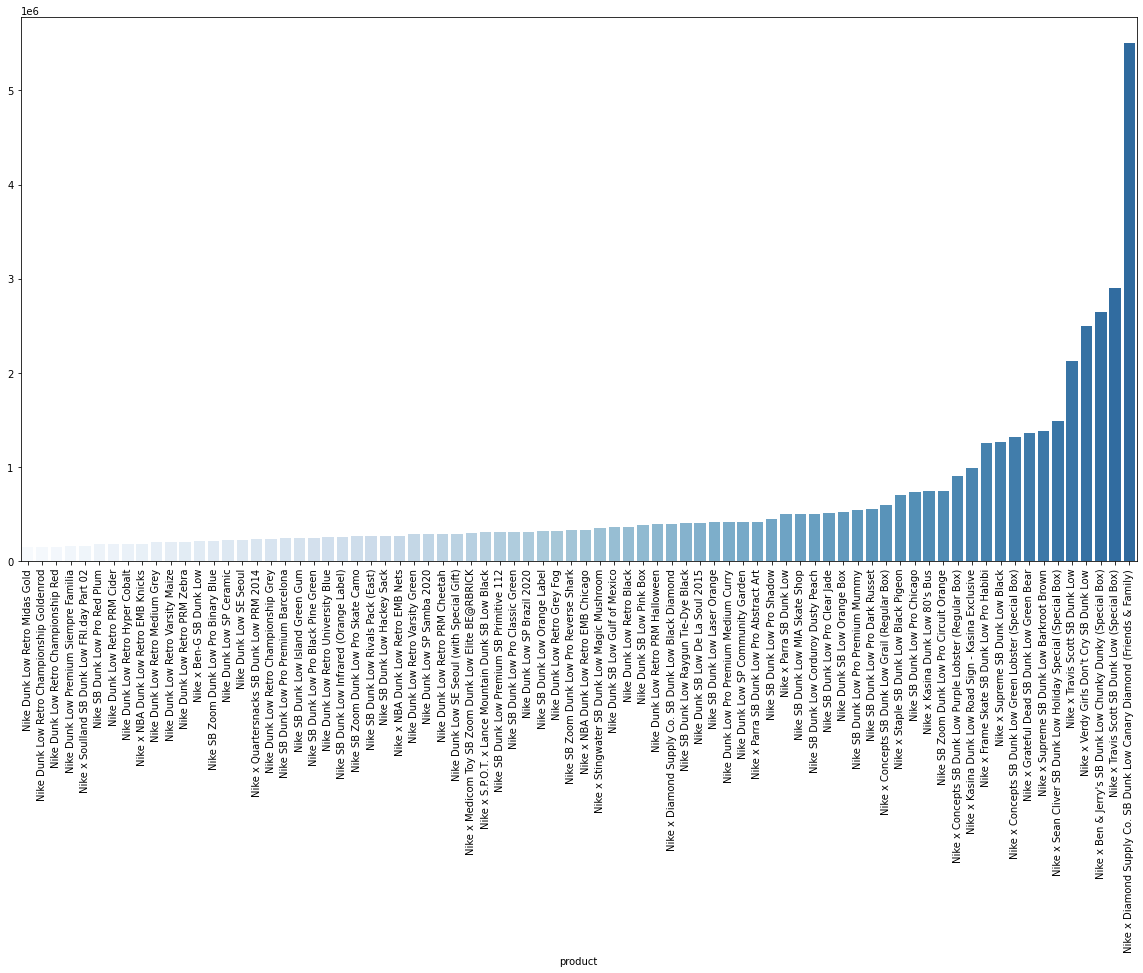

In [24]:
fig ,ax = plt.subplots(figsize = (20,10))
sns.barplot(df_men_pp.index,df_men_pp.values ,ax = ax)
plt.xticks(rotation = 90)
plt.show()

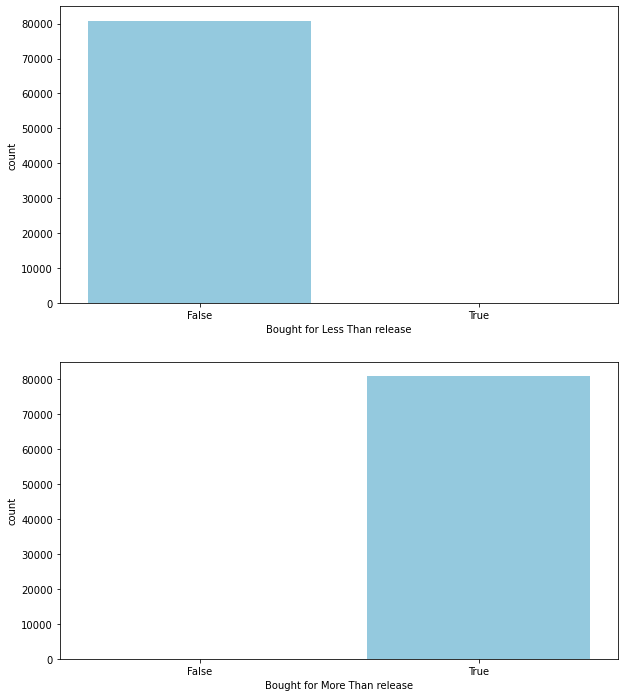

In [25]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_men['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_men['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()

In [26]:
df_men_re_10 = np.round(df_men.groupby('product')['release_price'].mean(),0).sort_values(ascending = False).head(10)
df_men_p_10 =np.round(df_men.groupby('product')['price'].mean(),0).sort_values(ascending = False).head(10)

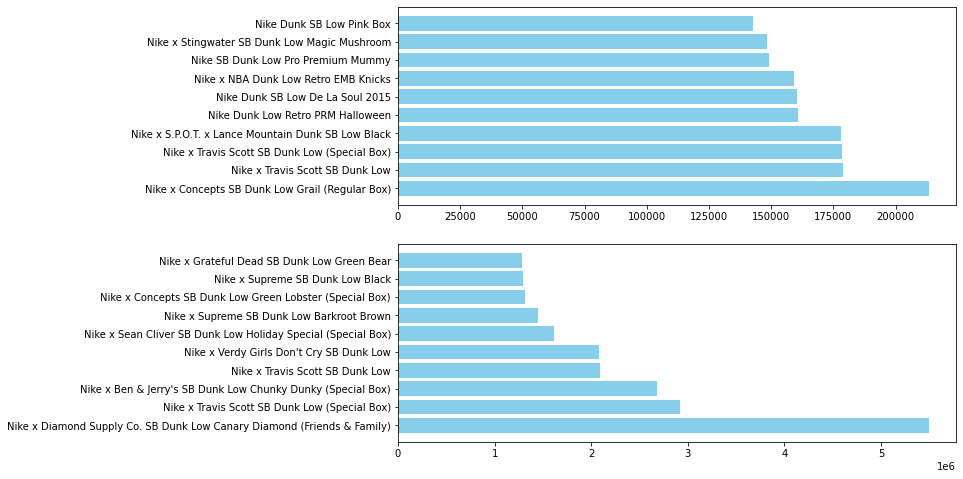

In [27]:
# 남성 신발 기준 발매가 상위품목과 현재 판매가 상위 품목 비교 

fig,axes = plt.subplots(2,1, figsize = (10,8))
axes[0].barh(df_men_re_10.index , df_men_re_10.values   , color = "skyblue")
axes[1].barh(df_men_p_10.index , df_men_p_10.values   , color = "skyblue")
plt.show()

In [28]:
# 가격 상승률이 높은 제품 
df_men_Rise = pd.DataFrame(df_men.groupby('product')['Rise'].mean().round(2).sort_values(ascending = True))
df_men_Rise.head(3)

,Rise
product,
Nike x NBA Dunk Low Retro EMB Knicks,114.47
Nike Dunk Low Premium Siempre Familia,115.22
Nike Dunk Low Retro Midas Gold,127.39


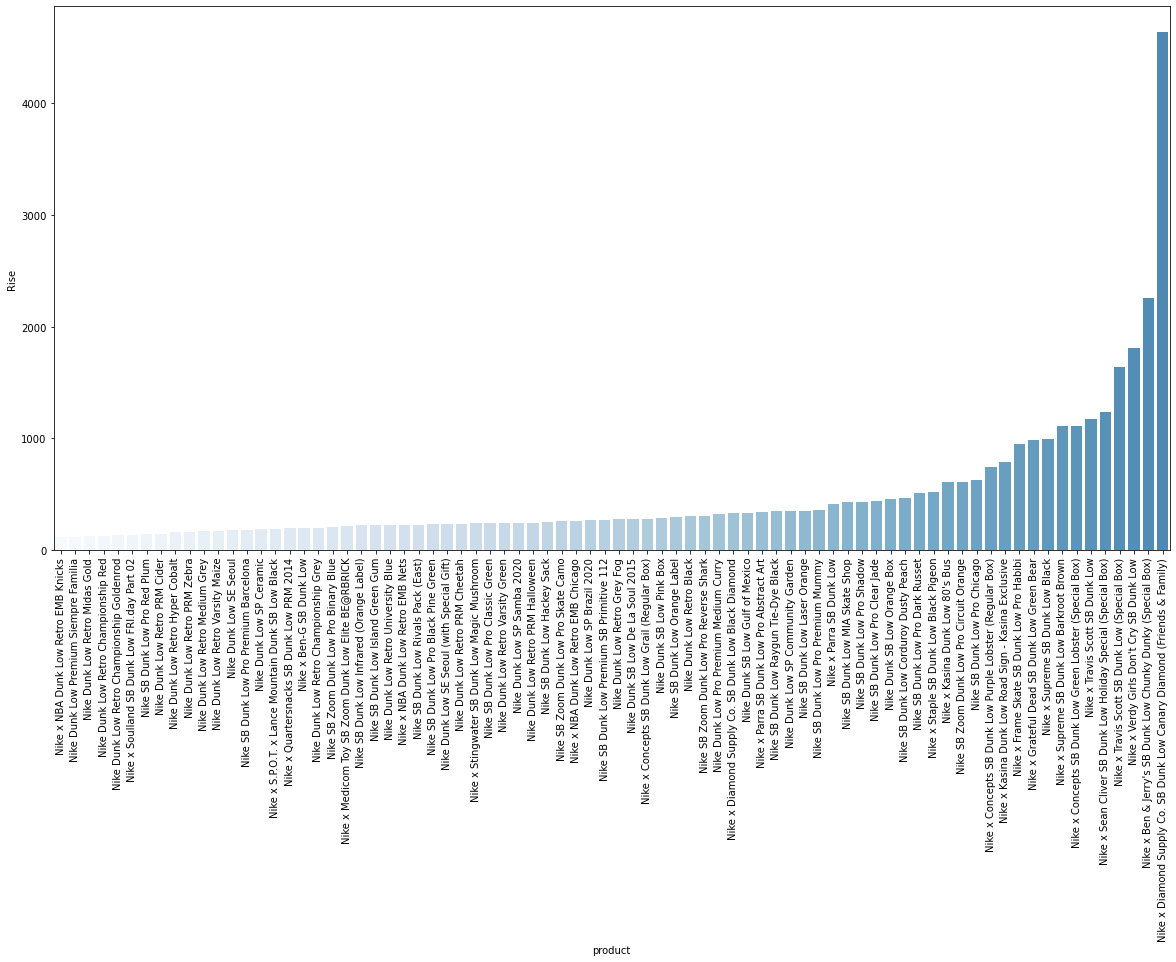

In [29]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.set_palette("Blues",120)
sns.barplot(df_men_Rise.index , df_men_Rise['Rise'], ax =ax )
plt.xticks(rotation = 90)
plt.show()

In [46]:
df_men.columns

Index(['size', 'price', 'date', 'product', 'release_date', 'color',
       'release_price', 'number', 'wish', 'review', 'transactions',
       'size_target', 'color1', 'color2', 'color3', 'color4', 'after_day',
       'Bought for Less Than release', 'Bought for More Than release', 'Rise',
       'profit'],
      dtype='object')

In [61]:
# 남성 제품 중 소비자들이 사고 싶은 신발 top 10
df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10)

product
Nike Dunk Low Retro Black                 51000.0
Nike Dunk Low Retro Varsity Green         24000.0
Nike Dunk Low Retro University Blue       16000.0
Nike Dunk Low Retro Grey Fog              15000.0
Nike Dunk Low Retro Varsity Maize         12000.0
Nike Dunk Low SE Seoul                    11000.0
Nike x Kasina Dunk Low 80's Bus           11000.0
Nike Dunk Low Retro Championship Grey     11000.0
Nike SB Dunk Low Pro Chicago               8371.0
Nike Dunk Low Pro Premium Medium Curry     8193.0
Name: wish, dtype: float64

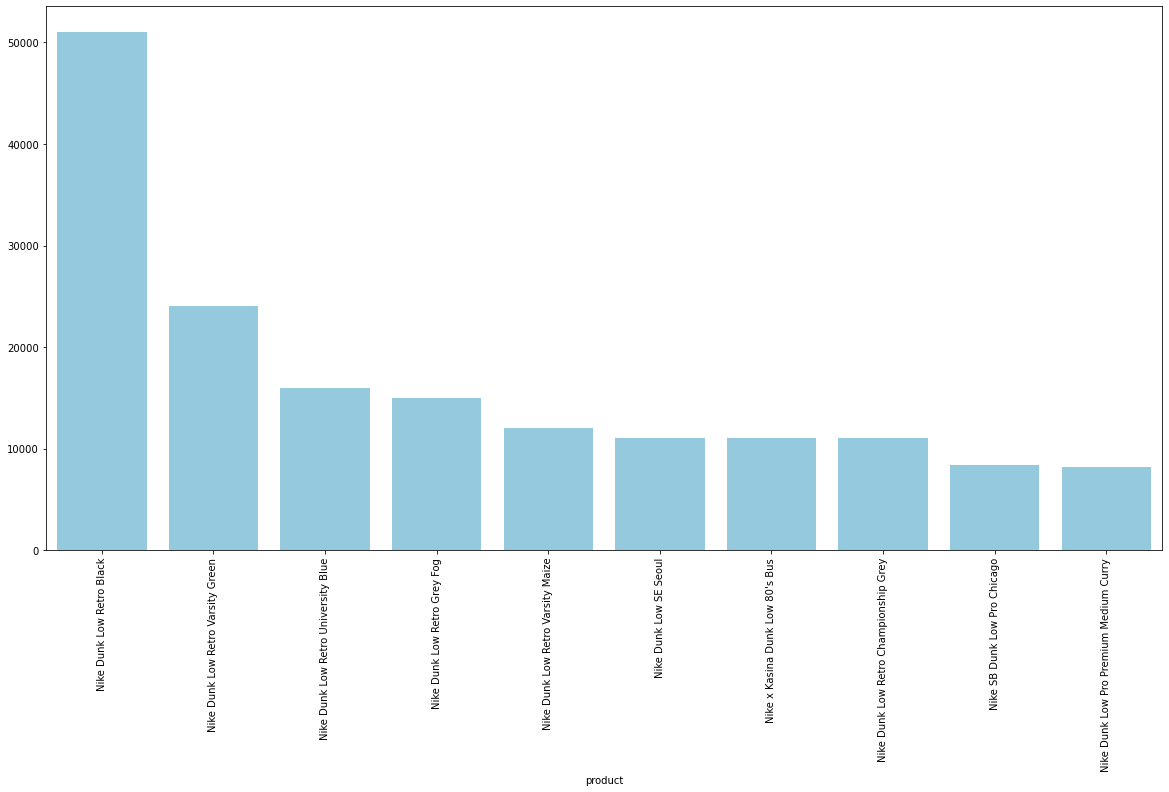

In [62]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.barplot(df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).index,
            df_men.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).values , color = 'skyblue')
plt.xticks(rotation = 90 )
plt.show()

In [30]:
# 여성
df_women = df.loc[(df['product'].str.contains('(GS)')) | (df['product'].str[:3] == '(W)')]
df_women.head()

,size,price,date,product,release_date,color,release_price,number,wish,review,...,size_target,color1,color2,color3,color4,after_day,Bought for Less Than release,Bought for More Than release,Rise,profit
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,9,False,True,248.02,149200
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,10,False,True,248.02,149200
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,16,False,True,277.78,179200
3,235,260000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,17,False,True,257.94,159200
4,240,240000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,"['WOLFGREY', 'DARKOBSIDIAN-TOTALORANGE', '', '']",100800,43208.0,2766.0,8.0,...,Female,WOLFGREY,DARKOBSIDIAN-TOTALORANGE,NaN,NaN,17,False,True,238.10,139200


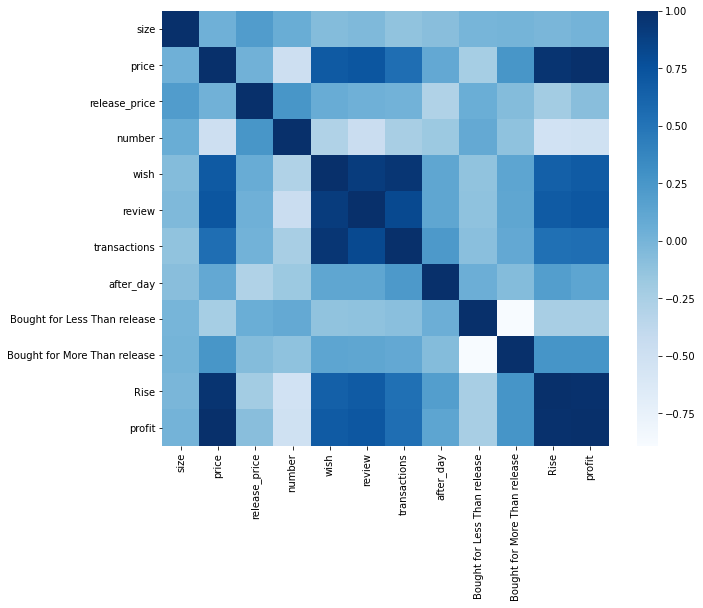

In [31]:
fig, ax = plt.subplots(figsize  = (10,8))
sns.heatmap(df_women.corr(), cmap = 'Blues')

plt.show()

In [32]:
# product 
df_women_product_count = pd.DataFrame(df_women['product'].value_counts().sort_values(ascending = True))
df_women_product_count = df_women_product_count[df_women_product_count['product']>= 1060]
df_women_product_count.head()

,product
(W) Nike Dunk Low Light Soft Pink,1064
(W) Nike Dunk Low Archeo Pink,1251
(W) Nike Dunk Low SE Candy,1405
(W) Nike Dunk Low Photon Dust,1433
(GS) Nike Dunk Low Varsity Maize,1449


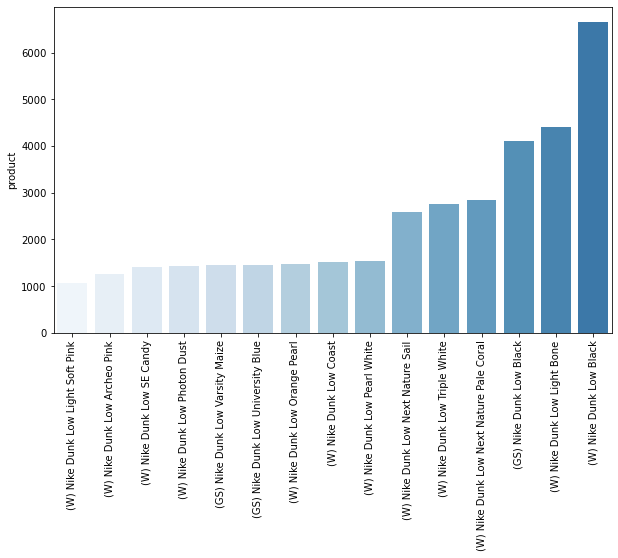

In [33]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 20)
sns.barplot(df_women_product_count.index ,df_women_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

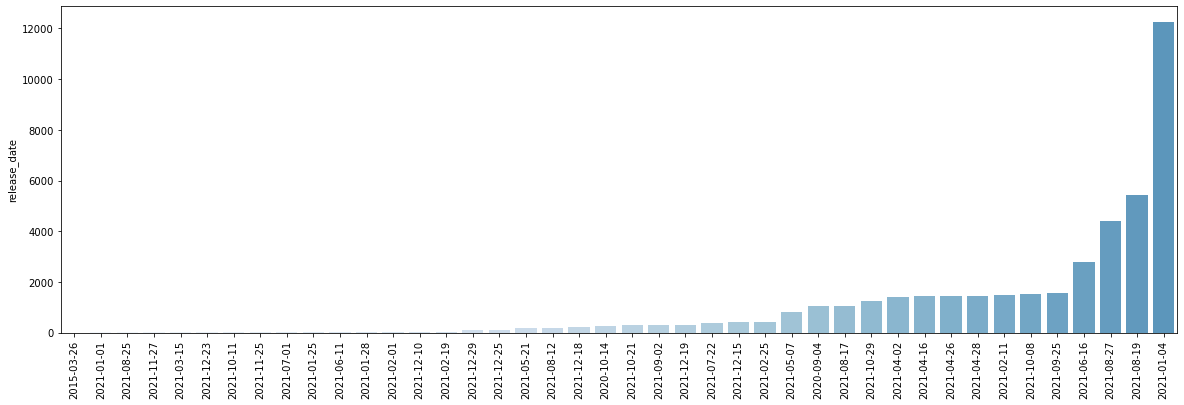

In [34]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 70)
sns.barplot(df_women['release_date'].value_counts().sort_values(ascending = True).index, 
            df_women['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [35]:
df_women_date = pd.DataFrame(df_women['date'].value_counts())
df_women_date = df_women_date[df_women_date['date'] >=300]

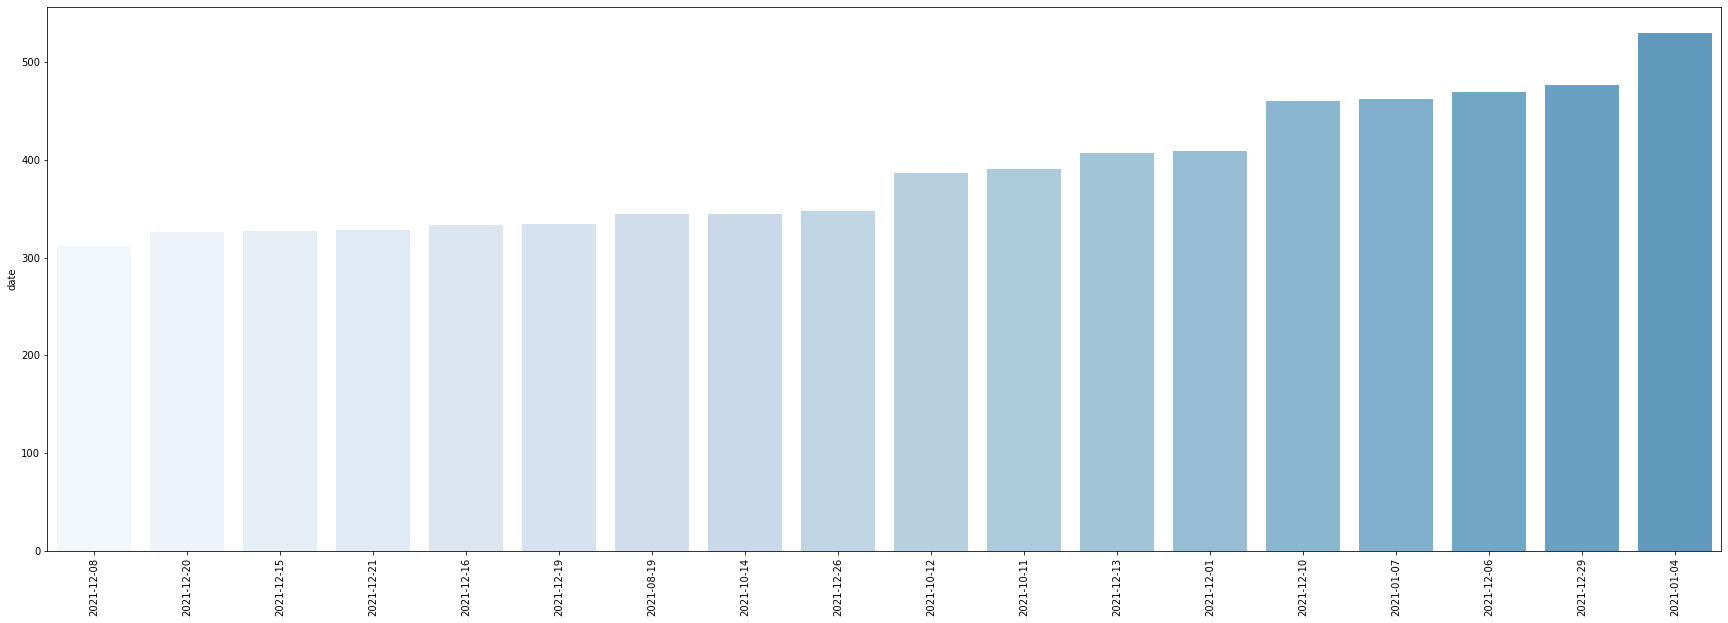

In [36]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",30)
sns.barplot(df_women_date.index, 
            df_women_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

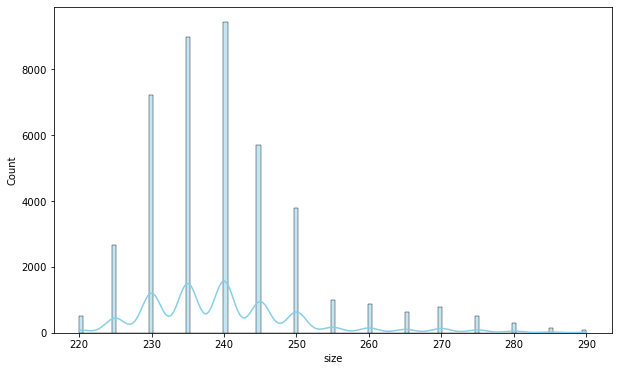

In [37]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_women['size'], kde = True, ax = ax, color = 'skyblue')
plt.show()

In [38]:
df_women_size_p = df_women.groupby('size')['price'].median().round(0)

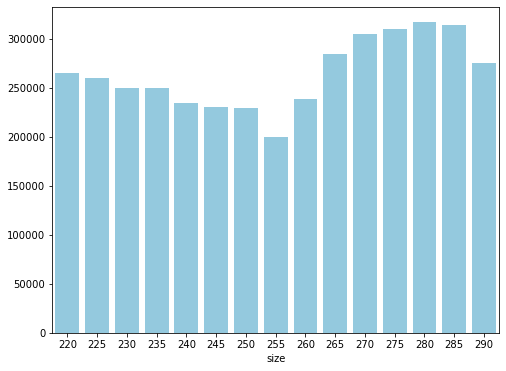

In [39]:
# 사이즈 따른 가격

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df_women_size_p.index , df_women_size_p.values , ax = ax, color = 'skyblue')
plt.show()

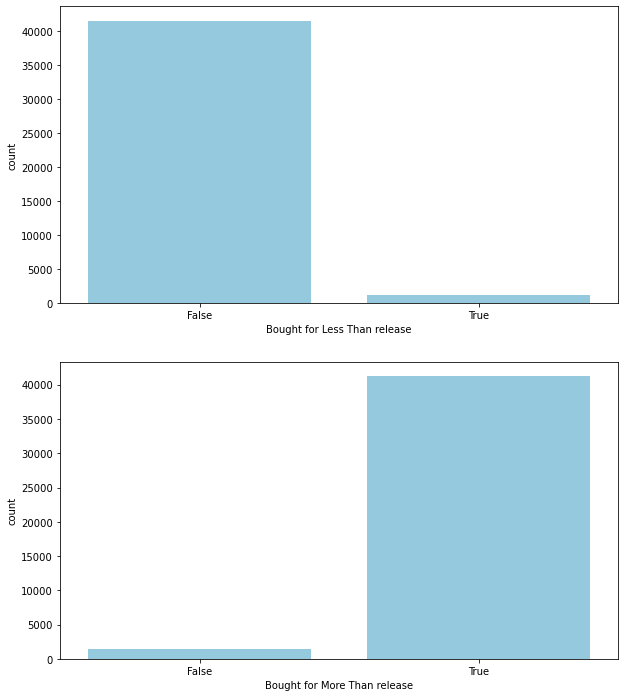

In [40]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_women['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_women['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()

In [41]:
df_women_re_10 = np.round(df_women.groupby('product')['release_price'].mean(),0).sort_values(ascending = False).head(10)
df_women_p_10 =np.round(df_women.groupby('product')['price'].mean(),0).sort_values(ascending = False).head(10)

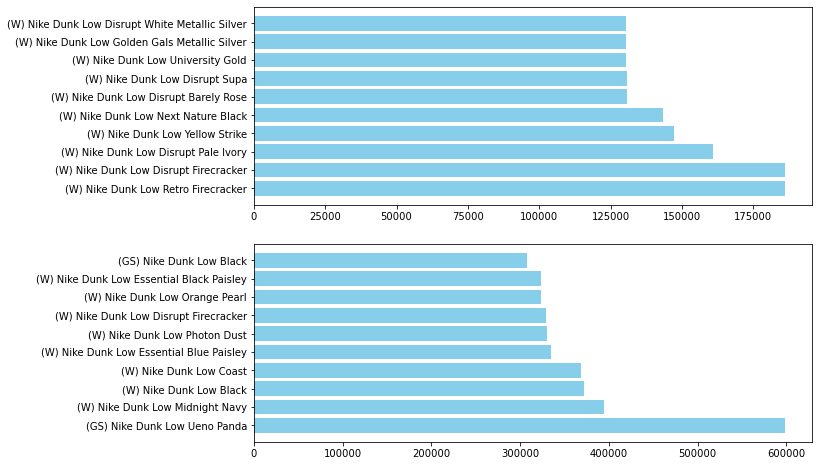

In [42]:
# 남성 신발 기준 발매가 상위품목과 현재 판매가 상위 품목 비교 

fig,axes = plt.subplots(2,1, figsize = (10,8))
axes[0].barh(df_women_re_10.index , df_women_re_10.values   , color = "skyblue")
axes[1].barh(df_women_p_10.index , df_women_p_10.values   , color = "skyblue")
plt.show()

In [43]:
# 가격 상승률이 높은 제품 
df_women_Rise = pd.DataFrame(df_women.groupby('product')['Rise'].mean().round(2).sort_values(ascending = True))
df_women_Rise.head(3)

,Rise
product,
(W) Nike Dunk Low Disrupt University Red,84.90
(W) Nike Dunk Low Light Soft Pink,103.77
(W) Nike Dunk Low Disrupt Black Gum,104.77


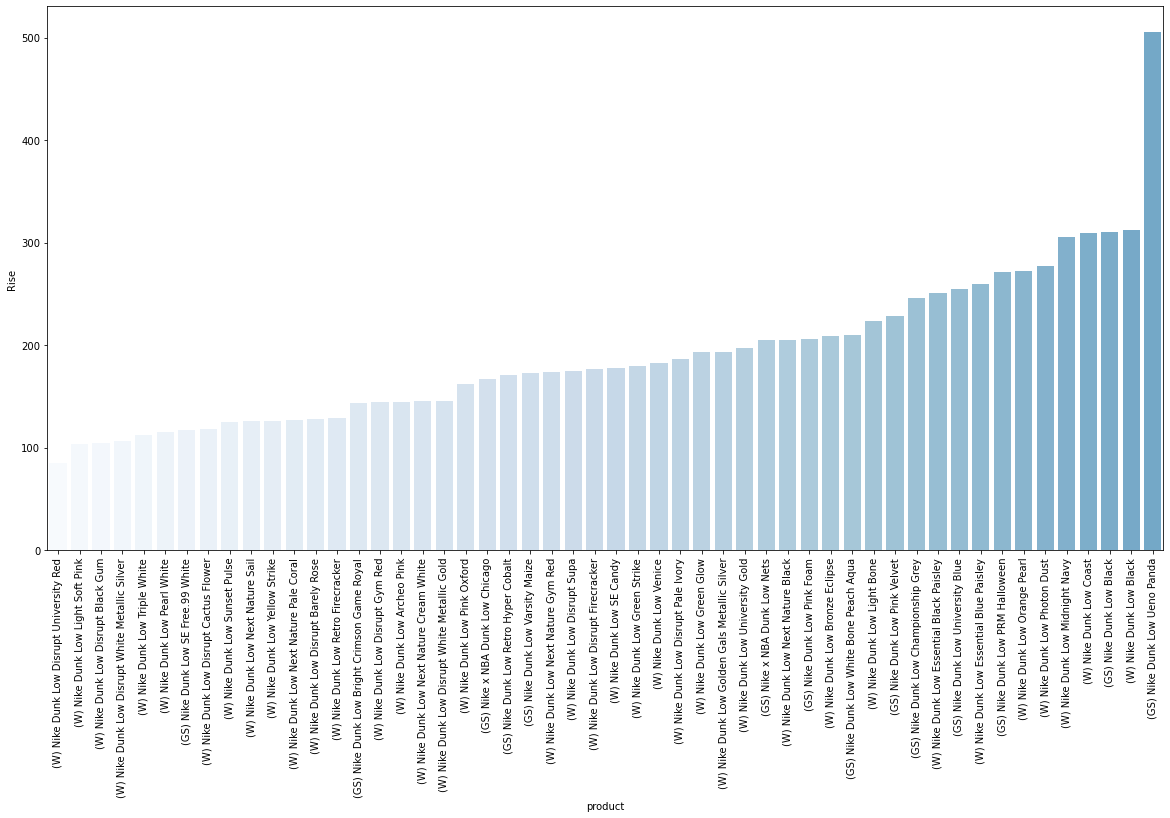

In [44]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.set_palette("Blues",100)
sns.barplot(df_women_Rise.index , df_women_Rise['Rise'], ax =ax )
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# 여성 제품 중 소비자들이 사고 싶은 신발 top 10
df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10)

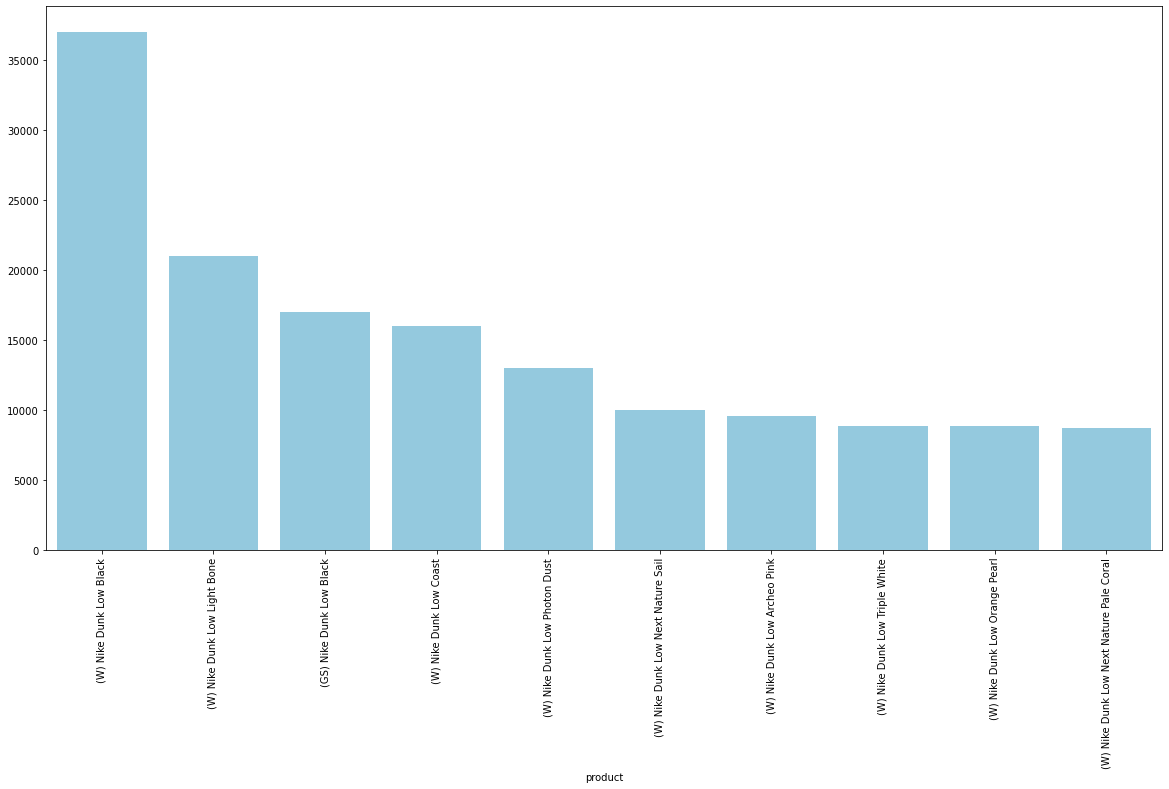

In [66]:
fig, ax = plt.subplots(figsize  = (20,10))
sns.barplot(df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).index,
            df_women.groupby('product')['wish'].mean().sort_values(ascending  = False).head(10).values , color = 'skyblue')
plt.xticks(rotation = 90 )
plt.show()